SNR for the original image = 4.0504901067316625
SNR for the image obtained after reconstruction = 4.050490106731663


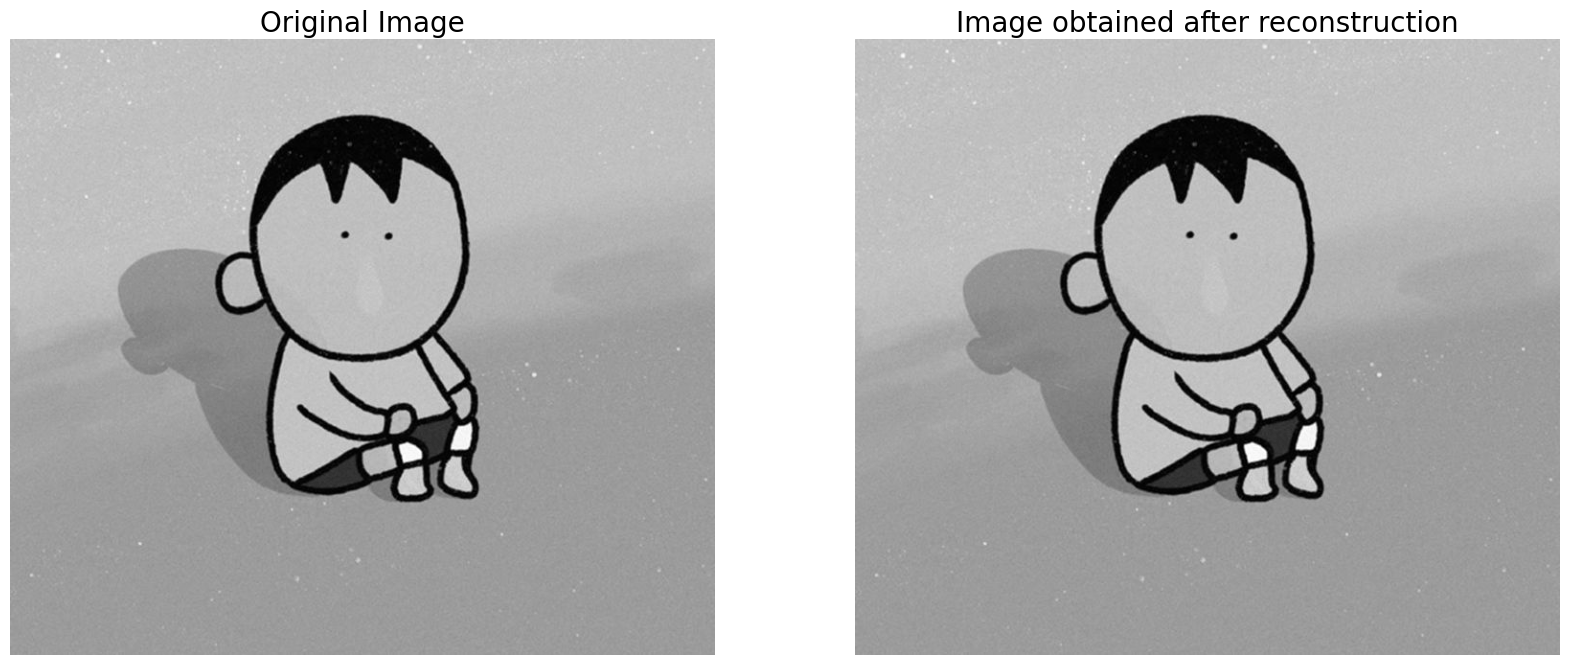

In [5]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from scipy import stats
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit

im = np.array(Image.open('img1.jpeg').convert('L'))

def signal_to_noise_ratio(image):
    mean = np.mean(image)
    std = np.std(image)
    return mean / std if std != 0 else 0

snr = signal_to_noise_ratio(im)
print('SNR for the original image = ' + str(snr))

# Perform FFT and IFFT
freq = fp.fft2(im)
im1 = fp.ifft2(freq).real

snr = signal_to_noise_ratio(im1)
print('SNR for the image obtained after reconstruction = ' + str(snr))

assert(np.allclose(im, im1))

pylab.figure(figsize=(20,10))
pylab.subplot(121), pylab.imshow(im, cmap='gray'), pylab.axis('off')
pylab.title('Original Image', size=20)
pylab.subplot(122), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
pylab.title('Image obtained after reconstruction', size=20)
pylab.show()


C:\Users\safar\AppData\Local\Temp\ipykernel_19636\2632601917.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))


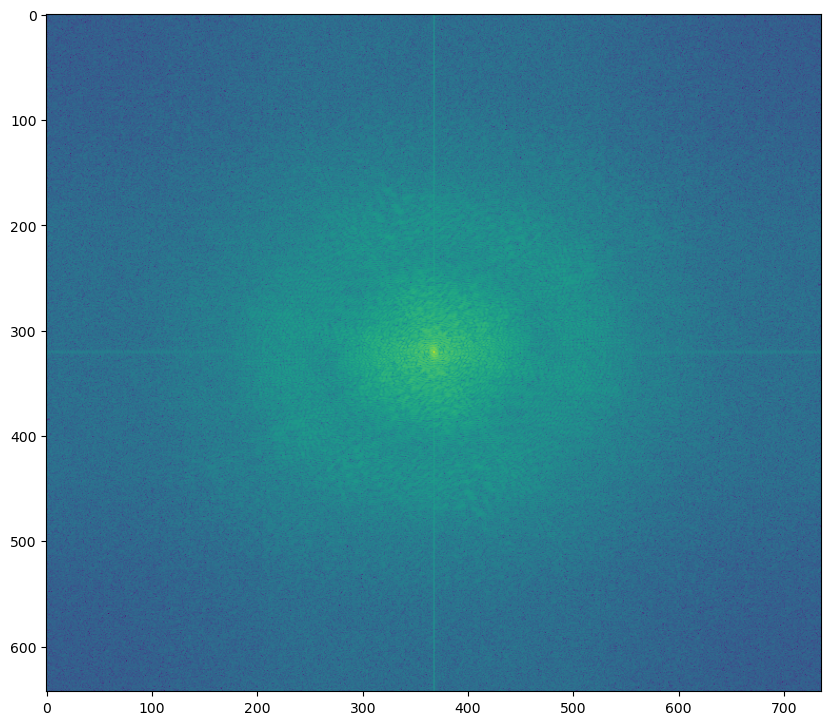

In [17]:
freq2 = fp.fftshift(freq)
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)) 
pylab.show()

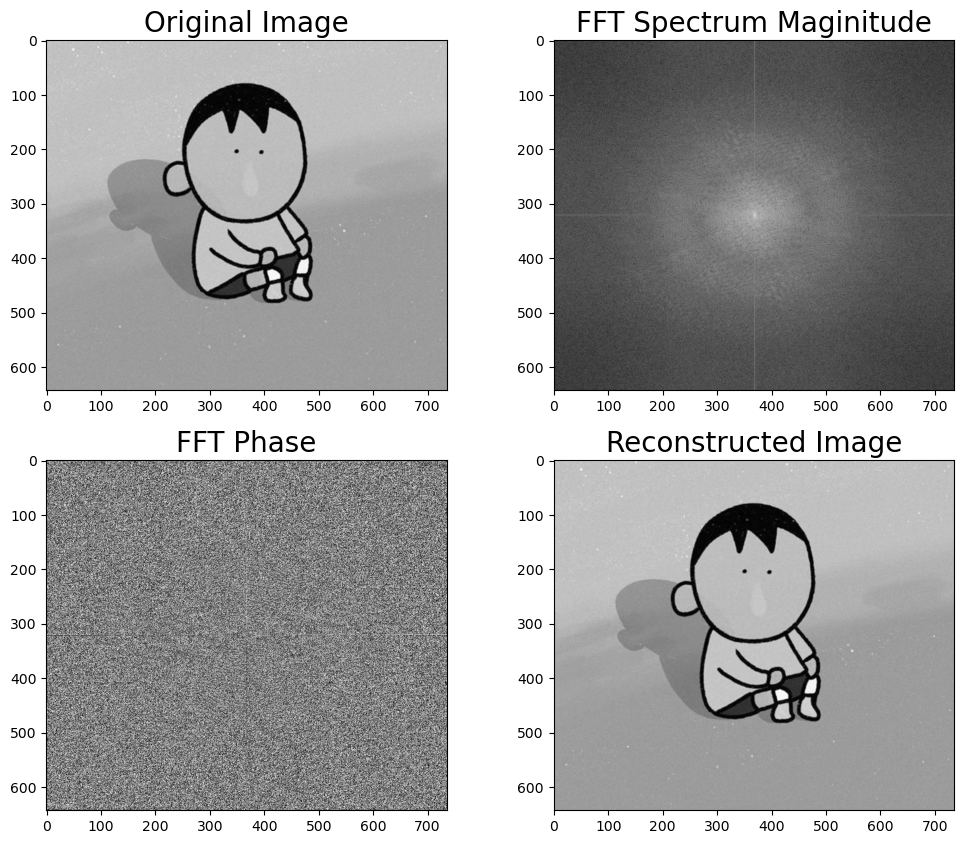

In [8]:
im1 = rgb2gray(imread('img1.jpeg'))
pylab.figure(figsize=(12,10))
freq1 = fp.fft2(im1)
im1_ = fp.ifft2(freq1).real
pylab.subplot(2,2,1)
pylab.imshow(im1, cmap='gray')
pylab.title('Original Image', size=20)
pylab.subplot(2,2,2)
pylab.imshow(20*np.log10( 0.01 + np.abs(fp.fftshift(freq1))), cmap='gray')
pylab.title('FFT Spectrum Maginitude', size=20)
pylab.subplot(2,2,3)
pylab.imshow(np.angle(fp.fftshift(freq1)),cmap='gray')
pylab.title('FFT Phase', size=20)
pylab.subplot(2,2,4)
pylab.imshow(np.clip(im1_,0,255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

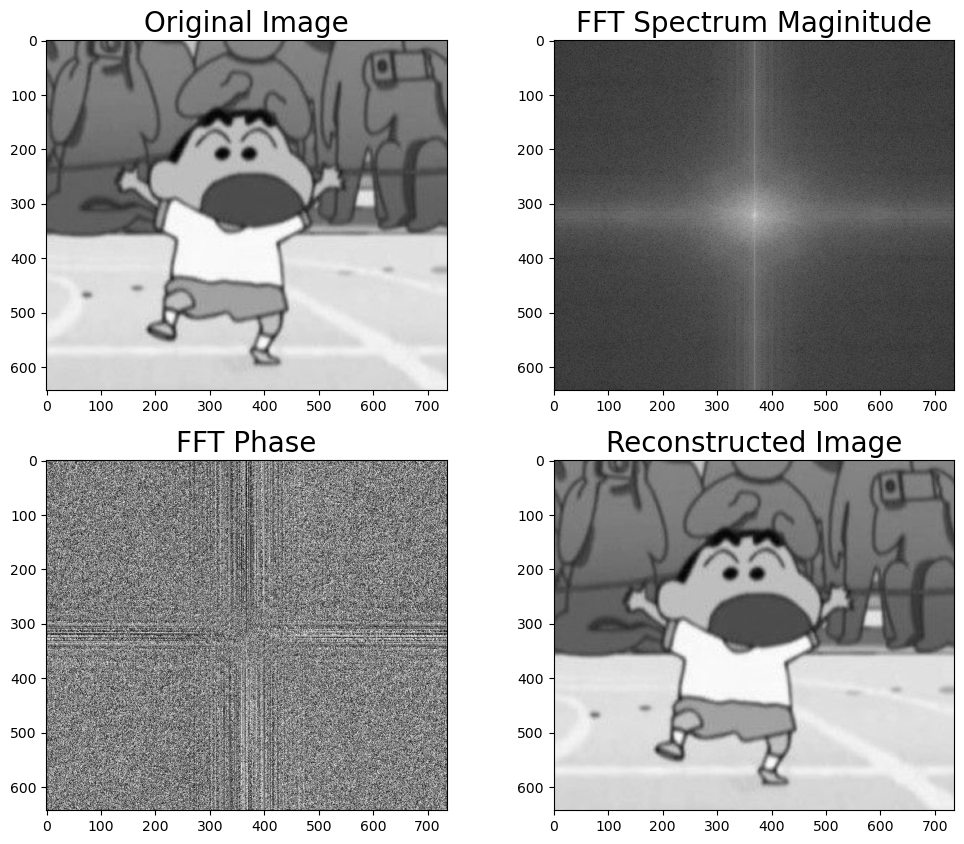

In [18]:
im2 = rgb2gray(imread('img2.jpg'))
pylab.figure(figsize=(12,10))
freq2 = fp.fft2(im2)
im2_ = fp.ifft2(freq2).real
pylab.subplot(2,2,1)
pylab.imshow(im2, cmap='gray')
pylab.title('Original Image', size=20)
pylab.subplot(2,2,2)
pylab.imshow(20*np.log10( 0.01 + np.abs(fp.fftshift(freq2))), cmap='gray')
pylab.title('FFT Spectrum Maginitude', size=20)
pylab.subplot(2,2,3)
pylab.imshow(np.angle(fp.fftshift(freq2)), cmap='gray')
pylab.title('FFT Phase', size=20)
pylab.subplot(2,2,4)
pylab.imshow(np.clip(im2_,0,255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

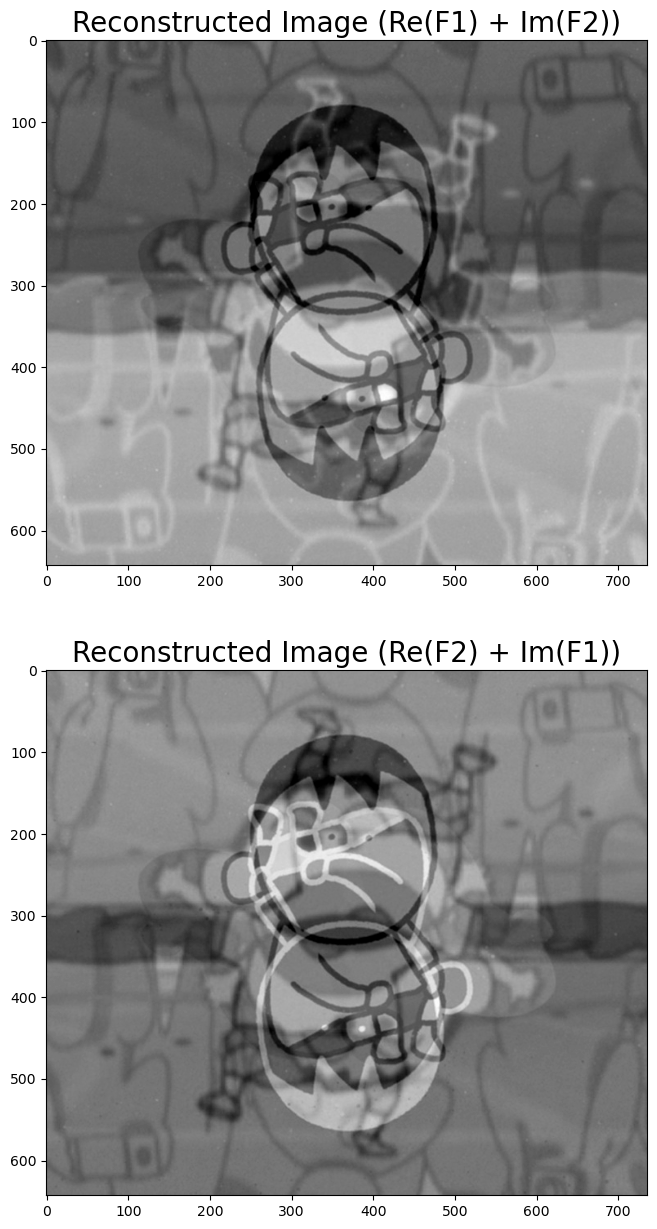

In [16]:
 pylab.figure(figsize=(20,15))
 im1_ = fp.ifft2(np.vectorize(complex)(freq1.real, freq2.imag)).real
 im2_ = fp.ifft2(np.vectorize(complex)(freq2.real, freq1.imag)).real
 pylab.subplot(211), pylab.imshow(np.clip(im1_,0,255), cmap='gray')
 pylab.title('Reconstructed Image (Re(F1) + Im(F2))', size=20)
 pylab.subplot(212), pylab.imshow(np.clip(im2_,0,255), cmap='gray')
 pylab.title('Reconstructed Image (Re(F2) + Im(F1))', size=20)
 pylab.show()